In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
data=pd.read_excel('churn_dataset.xlsx')
data

,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No
...,...,...,...,...
95,24,38,Female,No
96,26,24,Male,No
97,41,69,Female,Yes
98,18,70,Male,No


In [16]:
data.isna().sum()

Age       0
Tenure    0
Sex       0
Churn     0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     100 non-null    int64 
 1   Tenure  100 non-null    int64 
 2   Sex     100 non-null    object
 3   Churn   100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [18]:
data.describe()

,Age,Tenure
count,100.00000,100.00000
mean,40.88000,35.03000
std,13.99082,21.65732
min,18.00000,1.00000
25%,30.50000,14.75000
50%,41.00000,35.00000
75%,53.25000,54.25000
max,64.00000,71.00000


### convert catogrical Column {sex,churn}

In [19]:
df=pd.DataFrame(data=data)
df

,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No
...,...,...,...,...
95,24,38,Female,No
96,26,24,Male,No
97,41,69,Female,Yes
98,18,70,Male,No


In [20]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
print(df)

    Age  Tenure  Sex Churn
0    56       8    1    No
1    46      63    0    No
2    32      11    0    No
3    60       8    1    No
4    25      35    1    No
..  ...     ...  ...   ...
95   24      38    0    No
96   26      24    1    No
97   41      69    0   Yes
98   18      70    1    No
99   61      11    1    No

[100 rows x 4 columns]


In [21]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df)

    Age  Tenure  Sex  Churn
0    56       8    1      0
1    46      63    0      0
2    32      11    0      0
3    60       8    1      0
4    25      35    1      0
..  ...     ...  ...    ...
95   24      38    0      0
96   26      24    1      0
97   41      69    0      1
98   18      70    1      0
99   61      11    1      0

[100 rows x 4 columns]


### Train  Test SPlit Data

In [22]:
x=df.drop('Churn',axis=1)
y=df['Churn']

x

y

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Compute Accuracy Score

In [32]:
accuracy_score(y_pred,y_test)

0.8

 ### Compute confusion matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[16  0]
 [ 4  0]]


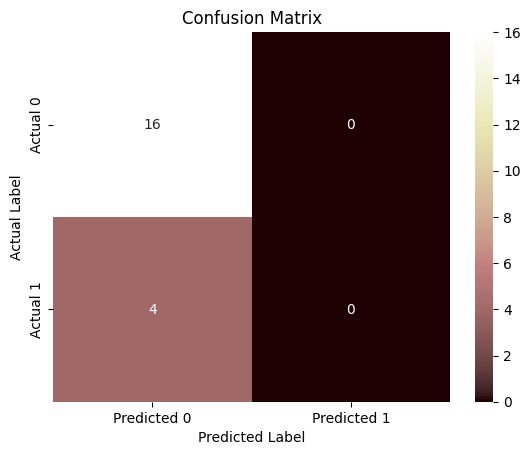

In [39]:
sns.heatmap(cm, annot=True, fmt="d", cmap="pink", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

### Save Model

In [40]:
import joblib

In [42]:
joblib.dump(model,"NaiveByesClassfire.pkl")

['NaiveByesClassfire.pkl']